## Lecture 07 - Neural Network, Tensorflow, Single Neuron, Multi-layer Neural Network

## Install tensorflow
```pip install --upgrade pip```

```pip install tensorflow```

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.metrics import roc_auc_score, accuracy_score

In [2]:
logData=pd.read_csv("./Data/logistic_regression_optimization.csv")

In [8]:
x = logData.iloc[:, 0:-1].values 
y = logData.iloc[:, -1:].values 

In [9]:
from sklearn.linear_model import LogisticRegression

In [13]:
clf = LogisticRegression(penalty='none', solver='lbfgs').fit(x, y)#Build a Logistic Regression Model
print([clf.coef_, clf.intercept_])

[array([[3.83389295, 1.1991905 , 4.52605611]]), array([-4.92802048])]


/home/dlai/Projects/Foundations_of_Analytics/demo/JupyterNotebook/analyticvenv/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Logistic regression with a single neuron Neural Network

### Create a nerual network of 1 neuron an 3 inputs  $x_1, x_2, x_3$ and that output $a$
i.e.
### $a=\frac{1}{1+exp\left(-(w_0+w_1 x_1+w_2 x_2+w_3 x_3)\right)}$

Loss function: binary_crossentropy which is

### $L=-\sum\limits_{i=1}^{N}(y^ilog(a^i)+(1-y^i)log(1-a^i))$
which is equivalent to binomial likelihood function except for a negative sign


In [77]:
model = tf.keras.Sequential() # start a sequential neuron
model.add(layers.Dense(1, input_shape=(3,),use_bias=True, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss='binary_crossentropy', metrics=['accuracy']) # define loss function and optimization methods

In [79]:
model.get_weights() #initial weights

[array([[0.75319886],
        [0.1865437 ],
        [0.966262  ]], dtype=float32),
 array([0.], dtype=float32)]

In [80]:
testinput=np.array([0, 1, 0])
1/(1+np.exp(-np.dot(model.get_weights()[0].reshape(-1),testinput))) #logistic function

0.5465011561672699

In [81]:
np.array(model(np.array([[0, 1, 0]])))

array([[0.54650116]], dtype=float32)

In [82]:
model.fit(x, y, epochs=200,validation_split=0.2, batch_size=50)

Train on 4000 samples, validate on 1000 samples
Epoch 1/200
4000/4000 [==============================] - 0s 59us/sample - loss: 0.2882 - accuracy: 0.8692 - val_loss: 0.2214 - val_accuracy: 0.9190
Epoch 2/200
4000/4000 [==============================] - 0s 16us/sample - loss: 0.2115 - accuracy: 0.9178 - val_loss: 0.1763 - val_accuracy: 0.9520
Epoch 3/200
4000/4000 [==============================] - 0s 16us/sample - loss: 0.1776 - accuracy: 0.9395 - val_loss: 0.1524 - val_accuracy: 0.9590
Epoch 4/200
4000/4000 [==============================] - 0s 16us/sample - loss: 0.1596 - accuracy: 0.9467 - val_loss: 0.1378 - val_accuracy: 0.9650
Epoch 5/200
4000/4000 [==============================] - 0s 16us/sample - loss: 0.1479 - accuracy: 0.9492 - val_loss: 0.1297 - val_accuracy: 0.9660
Epoch 6/200
4000/4000 [==============================] - 0s 16us/sample - loss: 0.1405 - accuracy: 0.9490 - val_loss: 0.1225 - val_accuracy: 0.9690
Epoch 7/200
4000/4000 [==============================] - 0s 16us

Epoch 56/200
4000/4000 [==============================] - 0s 17us/sample - loss: 0.1128 - accuracy: 0.9500 - val_loss: 0.0902 - val_accuracy: 0.9660
Epoch 57/200
4000/4000 [==============================] - 0s 17us/sample - loss: 0.1129 - accuracy: 0.9495 - val_loss: 0.0901 - val_accuracy: 0.9670
Epoch 58/200
4000/4000 [==============================] - 0s 16us/sample - loss: 0.1127 - accuracy: 0.9495 - val_loss: 0.0899 - val_accuracy: 0.9670
Epoch 59/200
4000/4000 [==============================] - 0s 17us/sample - loss: 0.1134 - accuracy: 0.9503 - val_loss: 0.0903 - val_accuracy: 0.9670
Epoch 60/200
4000/4000 [==============================] - 0s 16us/sample - loss: 0.1135 - accuracy: 0.9498 - val_loss: 0.0904 - val_accuracy: 0.9660
Epoch 61/200
4000/4000 [==============================] - 0s 16us/sample - loss: 0.1128 - accuracy: 0.9477 - val_loss: 0.0902 - val_accuracy: 0.9670
Epoch 62/200
4000/4000 [==============================] - 0s 17us/sample - loss: 0.1135 - accuracy: 0.9498

Epoch 111/200
4000/4000 [==============================] - 0s 15us/sample - loss: 0.1126 - accuracy: 0.9488 - val_loss: 0.0896 - val_accuracy: 0.9670
Epoch 112/200
4000/4000 [==============================] - 0s 17us/sample - loss: 0.1127 - accuracy: 0.9503 - val_loss: 0.0894 - val_accuracy: 0.9670
Epoch 113/200
4000/4000 [==============================] - 0s 18us/sample - loss: 0.1128 - accuracy: 0.9490 - val_loss: 0.0896 - val_accuracy: 0.9670
Epoch 114/200
4000/4000 [==============================] - 0s 17us/sample - loss: 0.1126 - accuracy: 0.9500 - val_loss: 0.0895 - val_accuracy: 0.9680
Epoch 115/200
4000/4000 [==============================] - 0s 18us/sample - loss: 0.1129 - accuracy: 0.9490 - val_loss: 0.0895 - val_accuracy: 0.9670
Epoch 116/200
4000/4000 [==============================] - 0s 17us/sample - loss: 0.1128 - accuracy: 0.9503 - val_loss: 0.0901 - val_accuracy: 0.9650
Epoch 117/200
4000/4000 [==============================] - 0s 18us/sample - loss: 0.1132 - accuracy:

4000/4000 [==============================] - 0s 17us/sample - loss: 0.1128 - accuracy: 0.9498 - val_loss: 0.0897 - val_accuracy: 0.9660
Epoch 166/200
4000/4000 [==============================] - 0s 17us/sample - loss: 0.1129 - accuracy: 0.9505 - val_loss: 0.0895 - val_accuracy: 0.9670
Epoch 167/200
4000/4000 [==============================] - 0s 18us/sample - loss: 0.1125 - accuracy: 0.9490 - val_loss: 0.0905 - val_accuracy: 0.9650
Epoch 168/200
4000/4000 [==============================] - 0s 20us/sample - loss: 0.1135 - accuracy: 0.9505 - val_loss: 0.0894 - val_accuracy: 0.9670
Epoch 169/200
4000/4000 [==============================] - 0s 20us/sample - loss: 0.1134 - accuracy: 0.9477 - val_loss: 0.0895 - val_accuracy: 0.9670
Epoch 170/200
4000/4000 [==============================] - 0s 20us/sample - loss: 0.1129 - accuracy: 0.9485 - val_loss: 0.0897 - val_accuracy: 0.9670
Epoch 171/200
4000/4000 [==============================] - 0s 19us/sample - loss: 0.1129 - accuracy: 0.9500 - val_

In [83]:
model.get_weights()

[array([[3.7255206],
        [1.1401794],
        [4.4363427]], dtype=float32),
 array([-4.794169], dtype=float32)]

In [84]:
import matplotlib.pyplot as plt

In [85]:
np.argmin(model.history.history['val_loss'])

121

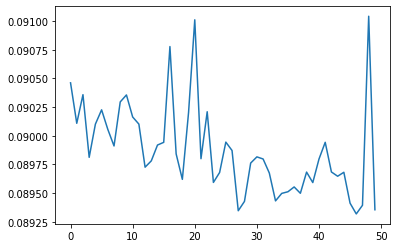

In [86]:
plt.plot(model.history.history['val_loss'][50:100])

### Final Neural Network

In [91]:
model = tf.keras.Sequential() # start a sequential neuron
model.add(layers.Dense(1, input_shape=(3,),use_bias=True, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss='binary_crossentropy', metrics=['accuracy']) # define loss function and optimization methods
model.fit(x, y, epochs=121, batch_size=50, verbose=0)

In [92]:
model.get_weights()

[array([[3.8090272],
        [1.2449797],
        [4.51939  ]], dtype=float32),
 array([-4.9395146], dtype=float32)]

## Fashion MNIST classification model

In [93]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist

**** Notes ****

In Mac Run the following command first if you encounter security warning

```open /Applications/Python\ 3.7/Install\ Certificates.command```

Example URL: https://www.tensorflow.org/tutorials/keras/classification

In [94]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [95]:
train_images.shape

(60000, 28, 28)

In [138]:
train_images[0].shape

(28, 28)

In [96]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

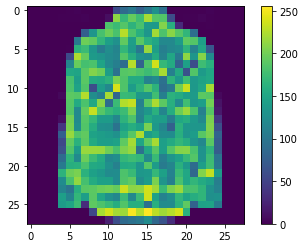

In [99]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[32])
plt.colorbar()
plt.grid(False)
plt.show()

In [100]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #input layer
    keras.layers.Dense(128, activation='relu'), #hidden layer
    keras.layers.Dense(10, activation='softmax') #Output layer
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [102]:
model.fit(train_images, train_labels, epochs=10,validation_split=0.2, batch_size=10)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 92us/sample - loss: 2.7326 - accuracy: 0.6455 - val_loss: 0.9136 - val_accuracy: 0.6596
Epoch 2/10
48000/48000 [==============================] - 5s 96us/sample - loss: 0.7806 - accuracy: 0.7221 - val_loss: 0.7340 - val_accuracy: 0.7423
Epoch 3/10
48000/48000 [==============================] - 5s 102us/sample - loss: 0.7034 - accuracy: 0.7595 - val_loss: 0.6055 - val_accuracy: 0.7950
Epoch 4/10
48000/48000 [==============================] - 5s 95us/sample - loss: 0.6680 - accuracy: 0.7724 - val_loss: 0.6892 - val_accuracy: 0.7699
Epoch 5/10
48000/48000 [==============================] - 4s 90us/sample - loss: 0.6544 - accuracy: 0.7806 - val_loss: 0.6278 - val_accuracy: 0.7774
Epoch 6/10
48000/48000 [==============================] - 5s 98us/sample - loss: 0.6405 - accuracy: 0.7839 - val_loss: 0.6575 - val_accuracy: 0.7990
Epoch 7/10
48000/48000 [==============================]

In [112]:
np.argmin(model.history.history['val_loss'])

2

In [113]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #input layer
    keras.layers.Dense(128, activation='relu'), #hidden layer
    keras.layers.Dense(10, activation='softmax') #Output layer
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=2,validation_split=0.2, batch_size=10)

Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 4s 91us/sample - loss: 2.7935 - accuracy: 0.6475 - val_loss: 0.8443 - val_accuracy: 0.6786
Epoch 2/2
48000/48000 [==============================] - 4s 92us/sample - loss: 0.7882 - accuracy: 0.7045 - val_loss: 0.6762 - val_accuracy: 0.7360


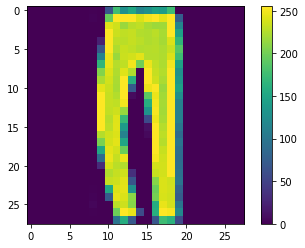

In [119]:
plt.figure()
plt.imshow(test_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

In [124]:
selectimageid=2

In [130]:
model.evaluate(test_images[selectimageid:(selectimageid+1)], test_labels[selectimageid:(selectimageid+1)], verbose=2)

1/1 - 0s - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [131]:
test_labels[selectimageid:(selectimageid+1)] #Ground Truth

array([1], dtype=uint8)

In [132]:
np.argmax(model.predict(test_images[selectimageid:(selectimageid+1)]))

1

In [129]:
model.predict(test_images[selectimageid:(selectimageid+1)])

array([[2.7519991e-18, 1.0000000e+00, 8.7743349e-19, 3.3419803e-12,
        0.0000000e+00, 0.0000000e+00, 2.6495455e-15, 0.0000000e+00,
        2.3309665e-15, 2.6120820e-38]], dtype=float32)